In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from itertools import product
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = pd.read_csv('/content/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.shape

(303, 14)

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Attribute Information
1. age
2. sex
3. chest pain type (4 values = 0,1,2,3)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. target: 0= less chance of heart attack 1= more chance of heart attack

In [ ]:
null_values = df.isnull().sum()
print("Null values in each column:\n", null_values)

Null values in each column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
X = df.drop("target", axis=1)
y = df["target"].apply(lambda x: 1 if x > 0 else 0)  # Binarize the target


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Hyperparameters: n_estimators, max_depth, min_samples_split, and max_leaf_nodes.

In [ ]:
# Define hyperparameters and their values
hyperparameters = {
    'n_estimators': [100, 500],
    'max_depth': [10, 20],
    'min_samples_split': [2, 10],
    'max_leaf_nodes': [10, 20]
}

1. Number of Trees (n_estimators)

  * Values: 100, 500
  * Justification: The number of trees affects the robustness and accuracy of the model. Increasing the number of trees generally improves performance due to reduced variance but increases computational cost. Testing 100 and 500 balances performance and efficiency.

2. Maximum Depth (max_depth)

  * Values: 10, 20
  * Justification: Controls the maximum depth of each tree. Deeper trees can capture more complex patterns but may overfit. Testing depths of 10 and 20 helps find a balance between complexity and overfitting.

3. Minimum Samples Split (min_samples_split)

  * Values: 2, 10
  * Justification: Minimum number of samples required to split an internal node. Lower values allow the model to learn more detailed patterns, while higher values can prevent overfitting. Testing 2 and 10 helps balance learning detailed patterns and generalization.

4. Maximum Leaf Nodes (max_leaf_nodes)

  * Values: 10, 20
  * Justification: Limits the number of leaf nodes in the trees. Fewer leaf nodes can simplify the model and help prevent overfitting. Testing 10 and 20 helps assess the trade-off between simplicity and model performance.

Tree Diagram

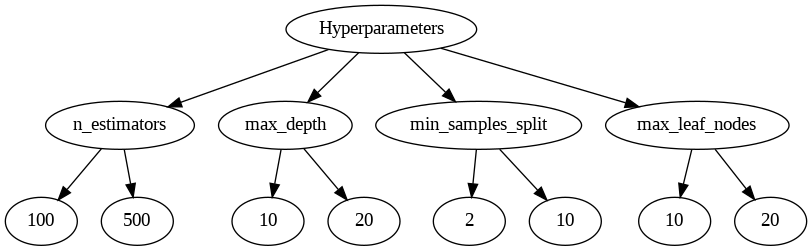

In [ ]:
import graphviz
from sklearn.ensemble import RandomForestClassifier

def create_hyperparameter_tree(hyperparameters):
    dot = graphviz.Digraph(comment='Hyperparameters Tree')

    # Adding root node
    dot.node('Root', 'Hyperparameters')

    # Adding hyperparameter nodes
    for i, (param, values) in enumerate(hyperparameters.items()):
        param_node = f'Param_{i}'
        dot.node(param_node, param)
        dot.edge('Root', param_node)

        # Adding value nodes
        for value in values:
            value_node = f'{param}_{value}'
            dot.node(value_node, str(value))
            dot.edge(param_node, value_node)

    return dot

# Define hyperparameters for Random Forest
hyperparameters_rf = {
    'n_estimators': [100, 500],
    'max_depth': [10, 20],
    'min_samples_split': [2, 10],
    'max_leaf_nodes': [10, 20]
}

# Create and render the tree
tree_rf = create_hyperparameter_tree(hyperparameters_rf)
tree_rf.render('hyperparameters_tree_rf', format='png')

# Display the image
Image(filename='hyperparameters_tree_rf.png')

In [ ]:
import pandas as pd

# Define the hyperparameters for both models
hyperparameters_rf = {
    'n_estimators': [100, 500],
    'max_depth': [10, 20],
    'min_samples_split': [2, 10],
    'max_leaf_nodes': [10, 20]
}

# Convert hyperparameters to DataFrame
df_hyperparameters_rf = pd.DataFrame.from_dict(hyperparameters_rf)

# Add a column for the model type
df_hyperparameters_rf['Model'] = 'Random Forest'

# Reorder columns for better readability
df_hyperparameters_rf = df_hyperparameters_rf[['Model', 'n_estimators', 'max_depth', 'min_samples_split', 'max_leaf_nodes']]

# Display the experimental design
print("Proposed Experimental Design:")
print(df_hyperparameters_rf)


Proposed Experimental Design:
           Model  n_estimators  max_depth  min_samples_split  max_leaf_nodes
0  Random Forest           100         10                  2              10
1  Random Forest           500         20                 10              20


Tuning

In [ ]:
# Train model with default Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict model
y_pred = model.predict(X_test)

# Performance evaluation metrics
print("\nRandom Forest Model Performance: ")
print("Accuracy: ", accuracy_score(y_pred, y_test))
print("\nClassification Report\n ")
print(classification_report(y_pred, y_test))


Random Forest Model Performance: 
Accuracy:  0.8360655737704918

Classification Report
 
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [ ]:
# Hyperparater Tuning (Combination 1)
model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, max_leaf_nodes=10)
model.fit(X_train, y_train)

# Predict model
y_pred = model.predict(X_test)

# Performance evaluation metrics
print("\nRandom Forest Model Performance (combination 1): ")
print("Accuracy: ", accuracy_score(y_pred, y_test))
print("\nClassification Report\n ")
print(classification_report(y_pred, y_test))


Random Forest Model Performance (combination 1): 
Accuracy:  0.8688524590163934

Classification Report
 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.91      0.85      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [ ]:
# Hyperparater Tuning (Combination 2)
model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, max_leaf_nodes=20)
model.fit(X_train, y_train)

# Predict model
y_pred = model.predict(X_test)

# Performance evaluation metrics
print("\nRandom Forest Model Performance (combination 2): ")
print("Accuracy: ", accuracy_score(y_pred, y_test))
print("\nClassification Report\n ")
print(classification_report(y_pred, y_test))


Random Forest Model Performance (combination 2): 
Accuracy:  0.8688524590163934

Classification Report
 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.91      0.85      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [ ]:
# Hyperparater Tuning (Combination 3)
model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, max_leaf_nodes=10)
model.fit(X_train, y_train)

# Predict model
y_pred = model.predict(X_test)

# Performance evaluation metrics
print("\nRandom Forest Model Performance (combination 3): ")
print("Accuracy: ", accuracy_score(y_pred, y_test))
print("\nClassification Report\n ")
print(classification_report(y_pred, y_test))


Random Forest Model Performance (combination 3): 
Accuracy:  0.8852459016393442

Classification Report
 
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       0.91      0.88      0.89        33

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



In [ ]:
# Hyperparater Tuning (Combination 4)
model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, max_leaf_nodes=20)
model.fit(X_train, y_train)

# Predict model
y_pred = model.predict(X_test)

# Performance evaluation metrics
print("\nRandom Forest Model Performance (combination 4): ")
print("Accuracy: ", accuracy_score(y_pred, y_test))
print("\nClassification Report\n ")
print(classification_report(y_pred, y_test))


Random Forest Model Performance (combination 4): 
Accuracy:  0.8524590163934426

Classification Report
 
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        28
           1       0.88      0.85      0.86        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [ ]:
# Hyperparater Tuning (Combination 5)
model = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=2, max_leaf_nodes=10)
model.fit(X_train, y_train)

# Predict model
y_pred = model.predict(X_test)

# Performance evaluation metrics
print("\nRandom Forest Model Performance (combination 5): ")
print("Accuracy: ", accuracy_score(y_pred, y_test))
print("\nClassification Report\n ")
print(classification_report(y_pred, y_test))


Random Forest Model Performance (combination 5): 
Accuracy:  0.8688524590163934

Classification Report
 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.91      0.85      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [ ]:
# Hyperparater Tuning (Combination 6)
model = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=2, max_leaf_nodes=20)
model.fit(X_train, y_train)

# Predict model
y_pred = model.predict(X_test)

# Performance evaluation metrics
print("\nRandom Forest Model Performance (combination 6): ")
print("Accuracy: ", accuracy_score(y_pred, y_test))
print("\nClassification Report\n ")
print(classification_report(y_pred, y_test))


Random Forest Model Performance (combination 6): 
Accuracy:  0.8688524590163934

Classification Report
 
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [ ]:
# Hyperparater Tuning (Combination 7)
model = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=10, max_leaf_nodes=10)
model.fit(X_train, y_train)

# Predict model
y_pred = model.predict(X_test)

# Performance evaluation metrics
print("\nRandom Forest Model Performance (combination 7): ")
print("Accuracy: ", accuracy_score(y_pred, y_test))
print("\nClassification Report\n ")
print(classification_report(y_pred, y_test))


Random Forest Model Performance (combination 7): 
Accuracy:  0.8524590163934426

Classification Report
 
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        28
           1       0.88      0.85      0.86        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [ ]:
# Hyperparater Tuning (Combination 8)
model = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=10, max_leaf_nodes=20)
model.fit(X_train, y_train)

# Predict model
y_pred = model.predict(X_test)

# Performance evaluation metrics
print("\nRandom Forest Model Performance (combination 8): ")
print("Accuracy: ", accuracy_score(y_pred, y_test))
print("\nClassification Report\n ")
print(classification_report(y_pred, y_test))


Random Forest Model Performance (combination 8): 
Accuracy:  0.8688524590163934

Classification Report
 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.91      0.85      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [ ]:
# Hyperparater Tuning (Combination 9)
model = RandomForestClassifier(n_estimators=500, max_depth=10, min_samples_split=2, max_leaf_nodes=10)
model.fit(X_train, y_train)

# Predict model
y_pred = model.predict(X_test)

# Performance evaluation metrics
print("\nRandom Forest Model Performance (combination 9): ")
print("Accuracy: ", accuracy_score(y_pred, y_test))
print("\nClassification Report\n ")
print(classification_report(y_pred, y_test))


Random Forest Model Performance (combination 9): 
Accuracy:  0.8688524590163934

Classification Report
 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.91      0.85      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [ ]:
# Hyperparater Tuning (Combination 10)
model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=2, max_leaf_nodes=20)
model.fit(X_train, y_train)

# Predict model
y_pred = model.predict(X_test)

# Performance evaluation metrics
print("\nRandom Forest Model Performance (combination 10): ")
print("Accuracy: ", accuracy_score(y_pred, y_test))
print("\nClassification Report\n ")
print(classification_report(y_pred, y_test))


Random Forest Model Performance (combination 10): 
Accuracy:  0.8524590163934426

Classification Report
 
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        28
           1       0.88      0.85      0.86        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [ ]:
# Hyperparater Tuning (Combination 11)
model = RandomForestClassifier(n_estimators=500, max_depth=10, min_samples_split=10, max_leaf_nodes=10)
model.fit(X_train, y_train)

# Predict model
y_pred = model.predict(X_test)

# Performance evaluation metrics
print("\nRandom Forest Model Performance (combination 11): ")
print("Accuracy: ", accuracy_score(y_pred, y_test))
print("\nClassification Report\n ")
print(classification_report(y_pred, y_test))


Random Forest Model Performance (combination 11): 
Accuracy:  0.8688524590163934

Classification Report
 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.91      0.85      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [ ]:
# Hyperparater Tuning (Combination 12)
model = RandomForestClassifier(n_estimators=500, max_depth=10, min_samples_split=10, max_leaf_nodes=20)
model.fit(X_train, y_train)

# Predict model
y_pred = model.predict(X_test)

# Performance evaluation metrics
print("\nRandom Forest Model Performance (combination 12): ")
print("Accuracy: ", accuracy_score(y_pred, y_test))
print("\nClassification Report\n ")
print(classification_report(y_pred, y_test))


Random Forest Model Performance (combination 12): 
Accuracy:  0.8688524590163934

Classification Report
 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.91      0.85      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [ ]:
# Hyperparater Tuning (Combination 13)
model = RandomForestClassifier(n_estimators=500, max_depth=20, min_samples_split=2, max_leaf_nodes=10)
model.fit(X_train, y_train)

# Predict model
y_pred = model.predict(X_test)

# Performance evaluation metrics
print("\nRandom Forest Model Performance (combination 13): ")
print("Accuracy: ", accuracy_score(y_pred, y_test))
print("\nClassification Report\n ")
print(classification_report(y_pred, y_test))


Random Forest Model Performance (combination 13): 
Accuracy:  0.8688524590163934

Classification Report
 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.91      0.85      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [ ]:
# Hyperparater Tuning (Combination 14)
model = RandomForestClassifier(n_estimators=500, max_depth=20, min_samples_split=2, max_leaf_nodes=20)
model.fit(X_train, y_train)

# Predict model
y_pred = model.predict(X_test)

# Performance evaluation metrics
print("\nRandom Forest Model Performance (combination 14): ")
print("Accuracy: ", accuracy_score(y_pred, y_test))
print("\nClassification Report\n ")
print(classification_report(y_pred, y_test))


Random Forest Model Performance (combination 14): 
Accuracy:  0.8688524590163934

Classification Report
 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.91      0.85      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [ ]:
# Hyperparater Tuning (Combination 15)
model = RandomForestClassifier(n_estimators=500, max_depth=20, min_samples_split=10, max_leaf_nodes=10)
model.fit(X_train, y_train)

# Predict model
y_pred = model.predict(X_test)

# Performance evaluation metrics
print("\nRandom Forest Model Performance (combination 15): ")
print("Accuracy: ", accuracy_score(y_pred, y_test))
print("\nClassification Report\n ")
print(classification_report(y_pred, y_test))


Random Forest Model Performance (combination 15): 
Accuracy:  0.8688524590163934

Classification Report
 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.91      0.85      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [ ]:
# Hyperparater Tuning (Combination 16)
model = RandomForestClassifier(n_estimators=500, max_depth=20, min_samples_split=10, max_leaf_nodes=20)
model.fit(X_train, y_train)

# Predict model
y_pred = model.predict(X_test)

# Performance evaluation metrics
print("\nRandom Forest Model Performance (combination 16): ")
print("Accuracy: ", accuracy_score(y_pred, y_test))
print("\nClassification Report\n ")
print(classification_report(y_pred, y_test))


Random Forest Model Performance (combination 16): 
Accuracy:  0.8688524590163934

Classification Report
 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.91      0.85      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

